In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = '/content/drive/My Drive/Kaggle'

In [ ]:
%cd /content/drive/My\ Drive/Kaggle

/content/drive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d sizlingdhairya1/leaf-disease

leaf-disease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# !unzip leaf-disease.zip  && rm leaf-disease.zip

In [ ]:
base_dir = os.path.join('Datasets/train')
jml = 0
list = []

for i in os.listdir(base_dir):
  path = os.path.join(base_dir, i)
  for j in os.listdir(path):
    jml += 1
  list.append([i,jml])
  jml = 0

In [ ]:
print(list)

[['Bacteria', 45], ['Fungi', 45], ['Nematodes', 45], ['Normal', 35], ['Virus', 45]]


(256, 256, 3)
(150, 150, 3)


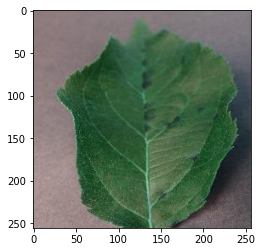

In [ ]:
import cv2

for i in os.listdir(base_dir):
  path = os.path.join(base_dir, i)
  for j in os.listdir(path):
    img = cv2.imread(os.path.join(path, j))
    print(img.shape)
    new = cv2.resize(img, (150, 150))
    plt.imshow(img)
    print(new.shape)
    break
  break

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
    'Datasets/train',
    color_mode = 'rgb',
    target_size = (250,250),
    batch_size = 64,
    class_mode = 'categorical',
    shuffle = True,
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_generator = test_datagen.flow_from_directory(
    'Datasets/validation',
    color_mode = 'rgb',
    target_size = (250,250),
    batch_size = 64,
    class_mode = 'categorical',
)

Found 215 images belonging to 5 classes.
Found 24 images belonging to 5 classes.


In [ ]:
import tensorflow as tf

resnet = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(250,250,3))
mobilenet = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(250,250,3))

resnet.trainable = False
mobilenet.trainable = False

In [ ]:
model = tf.keras.Sequential([
    resnet,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation="softmax")
])

model_mobilenet = tf.keras.Sequential([
    mobilenet,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 8, 8, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 10245     
Total params: 23,575,045
Trainable params: 10,245
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
model_mobilenet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 8, 8, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy")>0.99):
            print(" Reached 99% Accuracy")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
from time import time

t1 = time()
model.fit(train_generator, validation_data=test_generator, epochs=30, callbacks=[callbacks])

Epoch 1/30
4/4 [==============================] - 44s 11s/step - loss: 1.6920 - accuracy: 0.2977 - val_loss: 1.2205 - val_accuracy: 0.4167
Epoch 2/30
4/4 [==============================] - 31s 8s/step - loss: 1.1999 - accuracy: 0.4977 - val_loss: 0.8873 - val_accuracy: 0.6250
Epoch 3/30
4/4 [==============================] - 31s 8s/step - loss: 0.8064 - accuracy: 0.7070 - val_loss: 0.6727 - val_accuracy: 0.7500
Epoch 4/30
4/4 [==============================] - 31s 8s/step - loss: 0.6310 - accuracy: 0.7860 - val_loss: 0.5421 - val_accuracy: 0.9167
Epoch 5/30
4/4 [==============================] - 31s 8s/step - loss: 0.4974 - accuracy: 0.8698 - val_loss: 0.4553 - val_accuracy: 0.9583
Epoch 6/30
4/4 [==============================] - 38s 10s/step - loss: 0.4069 - accuracy: 0.8930 - val_loss: 0.3848 - val_accuracy: 0.9583
Epoch 7/30
4/4 [==============================] - 31s 8s/step - loss: 0.3362 - accuracy: 0.9163 - val_loss: 0.3327 - val_accuracy: 0.9583
Epoch 8/30
4/4 [================

In [ ]:
t2 = time()
model_mobilenet.fit(train_generator, validation_data=test_generator, epochs=30, callbacks=[callbacks])

Epoch 1/30
4/4 [==============================] - 10s 2s/step - loss: 1.7128 - accuracy: 0.2419 - val_loss: 1.3732 - val_accuracy: 0.4167
Epoch 2/30
4/4 [==============================] - 9s 2s/step - loss: 1.2758 - accuracy: 0.4512 - val_loss: 1.0474 - val_accuracy: 0.7083
Epoch 3/30
4/4 [==============================] - 11s 3s/step - loss: 0.9453 - accuracy: 0.6744 - val_loss: 0.8010 - val_accuracy: 0.7500
Epoch 4/30
4/4 [==============================] - 11s 3s/step - loss: 0.7572 - accuracy: 0.7721 - val_loss: 0.6350 - val_accuracy: 0.8333
Epoch 5/30
4/4 [==============================] - 9s 2s/step - loss: 0.5913 - accuracy: 0.8186 - val_loss: 0.5283 - val_accuracy: 0.8750
Epoch 6/30
4/4 [==============================] - 9s 2s/step - loss: 0.4924 - accuracy: 0.8651 - val_loss: 0.4605 - val_accuracy: 0.8750
Epoch 7/30
4/4 [==============================] - 9s 2s/step - loss: 0.4228 - accuracy: 0.8837 - val_loss: 0.3839 - val_accuracy: 0.8750
Epoch 8/30
4/4 [======================

In [ ]:
from tensorflow.keras.preprocessing import image

validation_base_dir = os.path.join("Datasets/validation")

# dibawah ini nama nya hanya perumpamaan saja
y_test = []
pred = []

def test():
  for i in os.listdir(validation_base_dir):
    path = os.path.join(validation_base_dir, i)

    for j in os.listdir(path):

      if i == "Bacteria":
        y_test.append(0)
      elif i == "Fungi":
        y_test.append(1)
      elif i == "Nematodes":
        y_test.append(2)
      elif i == "Virus":
        y_test.append(3)
      else:
        y_test.append(4)

      img = image.load_img(os.path.join(path, j), target_size=(250,250), color_mode="rgb")
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = x/255.0

      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)
      result = []

      argmax = np.argmax(classes[0])
      
      if argmax == 0:
        temp = "From Validation Class " + i + " -> Bacteria"
        kelas = 0
        pred.append(kelas)

      elif argmax == 1:
        temp = "From Validation Class " + i + " -> Fungi"
        kelas = 1
        pred.append(kelas)

      elif argmax == 2:
        temp = "From Validation Class " + i + " -> Nematodes"
        kelas = 2
        pred.append(kelas)

      elif argmax == 3:
        temp = "From Validation Class " + i + " -> Normal"
        kelas = 3
        pred.append(kelas)

      else:
        temp = "From Validation Class " + i + " -> Virus"
        kelas = 4
        pred.append(kelas)
      
      result.append(temp)
      print(result)


def test_mobilenet():
  for i in os.listdir(validation_base_dir):
    path = os.path.join(validation_base_dir, i)

    for j in os.listdir(path):

      if i == "Bacteria":
        y_test.append(0)
      elif i == "Fungi":
        y_test.append(1)
      elif i == "Nematodes":
        y_test.append(2)
      elif i == "Virus":
        y_test.append(3)
      else:
        y_test.append(4)

      img = image.load_img(os.path.join(path, j), target_size=(250,250), color_mode="rgb")
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = x/255.0

      images = np.vstack([x])
      classes = model_mobilenet.predict(images, batch_size=10)
      result = []

      argmax = np.argmax(classes[0])
      
      if argmax == 0:
        temp = "From Validation Class " + i + " -> Bacteria"
        kelas = 0
        pred.append(kelas)

      elif argmax == 1:
        temp = "From Validation Class " + i + " -> Fungi"
        kelas = 1
        pred.append(kelas)

      elif argmax == 2:
        temp = "From Validation Class " + i + " -> Nematodes"
        kelas = 2
        pred.append(kelas)

      elif argmax == 3:
        temp = "From Validation Class " + i + " -> Normal"
        kelas = 3
        pred.append(kelas)

      else:
        temp = "From Validation Class " + i + " -> Virus"
        kelas = 4
        pred.append(kelas)
      
      result.append(temp)
      print(result)

test()

[[0.7985543  0.06637133 0.0380412  0.09607937 0.00095379]]
['From Validation Class Bacteria -> Bacteria']
[[0.759217   0.05001205 0.01906332 0.16726486 0.00444278]]
['From Validation Class Bacteria -> Bacteria']
[[0.674129   0.20313421 0.00589193 0.11535151 0.00149332]]
['From Validation Class Bacteria -> Bacteria']
[[0.54978275 0.02777638 0.2893271  0.12479188 0.00832186]]
['From Validation Class Bacteria -> Bacteria']
[[0.9039351  0.07510303 0.00224397 0.00981911 0.00889884]]
['From Validation Class Bacteria -> Bacteria']
[[6.1110422e-02 1.1343117e-02 9.1668499e-01 1.0566396e-02 2.9513895e-04]]
['From Validation Class Nematodes -> Nematodes']
[[7.4526765e-03 5.5183168e-03 9.8661429e-01 3.8153934e-04 3.3138993e-05]]
['From Validation Class Nematodes -> Nematodes']
[[1.9032656e-03 3.2602828e-03 9.9459571e-01 1.8174262e-04 5.9054812e-05]]
['From Validation Class Nematodes -> Nematodes']
[[1.3203613e-02 6.3870610e-03 9.7906828e-01 1.2975971e-03 4.3468553e-05]]
['From Validation Class Nem

In [ ]:
test_mobilenet()

[[0.8613427  0.0067938  0.00267798 0.12506512 0.00412038]]
['From Validation Class Bacteria -> Bacteria']
[[0.97750175 0.00258095 0.00142114 0.01638686 0.00210923]]
['From Validation Class Bacteria -> Bacteria']
[[0.8426156  0.09231327 0.02384437 0.03412476 0.007102  ]]
['From Validation Class Bacteria -> Bacteria']
[[0.97214216 0.0045173  0.01379783 0.00823403 0.00130873]]
['From Validation Class Bacteria -> Bacteria']
[[9.8661578e-01 6.6877748e-03 2.7968348e-03 5.0956401e-04 3.3899299e-03]]
['From Validation Class Bacteria -> Bacteria']
[[0.09108372 0.01282593 0.88550794 0.00618178 0.0044006 ]]
['From Validation Class Nematodes -> Nematodes']
[[5.2078615e-04 5.0650886e-03 9.9395257e-01 2.8974962e-04 1.7182837e-04]]
['From Validation Class Nematodes -> Nematodes']
[[5.5409358e-03 5.5648461e-03 9.8733133e-01 1.4097970e-03 1.5316533e-04]]
['From Validation Class Nematodes -> Nematodes']
[[2.3226659e-03 3.2304567e-03 9.9356443e-01 7.8652333e-04 9.5785901e-05]]
['From Validation Class Nem

In [ ]:
train_generator.class_indices.values()

dict_values([0, 1, 2, 3, 4])

In [ ]:
train_generator.class_indices.keys()

dict_keys(['Bacteria', 'Fungi', 'Nematodes', 'Normal', 'Virus'])

FIINE TUNING RESNET AND MOBILENET

In [ ]:
print("Number of layers in the base model: ", len(resnet.layers))
print("Number of layers in the base model: ", len(mobilenet.layers))

Number of layers in the base model:  190
Number of layers in the base model:  155


In [ ]:
# for medium dataset
# dont forget  if u use fine tuning set learning rate to low 
# fine_tuning_at = 100

# for layer in resnet.layers[:fine_tuning_at]:
#   layer.trainable = False

# for layer in mobilenet.layers[:fine_tuning_at]:
#   layer.trainable = False

In [ ]:
resnet.trainable = True
mobilenet.trainable = True

In [ ]:
# recompile
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model_mobilenet.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 8, 8, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 10245     
Total params: 23,575,045
Trainable params: 23,529,605
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
model_mobilenet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 8, 8, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 2,230,277
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
model.fit(train_generator, validation_data=test_generator, epochs=30, callbacks=[callbacks])

Epoch 1/30
4/4 [==============================] - 116s 29s/step - loss: 0.5414 - accuracy: 0.8000 - val_loss: 0.1413 - val_accuracy: 1.0000
Epoch 2/30
4/4 [==============================] - 115s 29s/step - loss: 0.3976 - accuracy: 0.8605 - val_loss: 0.1340 - val_accuracy: 1.0000
Epoch 3/30
4/4 [==============================] - 115s 29s/step - loss: 0.3771 - accuracy: 0.8698 - val_loss: 0.1257 - val_accuracy: 1.0000
Epoch 4/30
4/4 [==============================] - 146s 36s/step - loss: 0.2577 - accuracy: 0.9628 - val_loss: 0.1185 - val_accuracy: 1.0000
Epoch 5/30
4/4 [==============================] - 117s 29s/step - loss: 0.2475 - accuracy: 0.9302 - val_loss: 0.1118 - val_accuracy: 1.0000
Epoch 6/30
4/4 [==============================] - 115s 29s/step - loss: 0.1696 - accuracy: 0.9767 - val_loss: 0.1060 - val_accuracy: 0.9583
Epoch 7/30
4/4 [==============================] - 114s 29s/step - loss: 0.1465 - accuracy: 0.9814 - val_loss: 0.1005 - val_accuracy: 0.9583
Epoch 8/30
4/4 [====

In [ ]:
model_mobilenet.fit(train_generator, validation_data=test_generator, epochs=30, callbacks=[callbacks])

Epoch 1/30
4/4 [==============================] - 40s 10s/step - loss: 1.3200 - accuracy: 0.5535 - val_loss: 0.0990 - val_accuracy: 1.0000
Epoch 2/30
4/4 [==============================] - 41s 10s/step - loss: 1.2089 - accuracy: 0.5860 - val_loss: 0.0940 - val_accuracy: 1.0000
Epoch 3/30
4/4 [==============================] - 39s 10s/step - loss: 1.0313 - accuracy: 0.6093 - val_loss: 0.0907 - val_accuracy: 1.0000
Epoch 4/30
4/4 [==============================] - 49s 12s/step - loss: 0.9128 - accuracy: 0.6512 - val_loss: 0.0875 - val_accuracy: 1.0000
Epoch 5/30
4/4 [==============================] - 39s 10s/step - loss: 0.8176 - accuracy: 0.7070 - val_loss: 0.0853 - val_accuracy: 1.0000
Epoch 6/30
4/4 [==============================] - 39s 10s/step - loss: 0.7372 - accuracy: 0.6977 - val_loss: 0.0840 - val_accuracy: 1.0000
Epoch 7/30
4/4 [==============================] - 39s 10s/step - loss: 0.7240 - accuracy: 0.7163 - val_loss: 0.0815 - val_accuracy: 1.0000
Epoch 8/30
4/4 [===========

In [ ]:
test()

[[0.8775725  0.06128008 0.02649392 0.03349793 0.00115561]]
['From Validation Class Bacteria -> Bacteria']
[[0.9093746  0.01100808 0.00130731 0.07536916 0.0029408 ]]
['From Validation Class Bacteria -> Bacteria']
[[7.9734784e-01 6.5143377e-02 2.8494356e-04 1.3595732e-01 1.2664744e-03]]
['From Validation Class Bacteria -> Bacteria']
[[0.7027002  0.02277252 0.19085383 0.07117157 0.01250189]]
['From Validation Class Bacteria -> Bacteria']
[[9.6444350e-01 3.1261858e-02 9.1897725e-04 1.0290006e-03 2.3467198e-03]]
['From Validation Class Bacteria -> Bacteria']
[[1.7483469e-02 4.4057388e-03 9.7652370e-01 1.3702132e-03 2.1690469e-04]]
['From Validation Class Nematodes -> Nematodes']
[[1.0356947e-03 1.0794559e-03 9.9782157e-01 3.6435547e-05 2.6928683e-05]]
['From Validation Class Nematodes -> Nematodes']
[[4.5676267e-04 1.7145926e-03 9.9776709e-01 1.1840840e-05 4.9730475e-05]]
['From Validation Class Nematodes -> Nematodes']
[[1.7852839e-03 6.3730549e-04 9.9741518e-01 1.4067738e-04 2.1466529e-05

In [ ]:
test_mobilenet()

[[5.1950014e-01 1.9985887e-03 1.4234024e-04 4.6887624e-01 9.4828047e-03]]
['From Validation Class Bacteria -> Bacteria']
[[8.8190907e-01 8.2061731e-04 3.3400305e-05 1.1466957e-01 2.5673376e-03]]
['From Validation Class Bacteria -> Bacteria']
[[9.3331116e-01 3.8693037e-02 5.0209521e-04 2.4238614e-02 3.2550960e-03]]
['From Validation Class Bacteria -> Bacteria']
[[9.7425157e-01 9.7514148e-04 6.7071134e-04 2.3027753e-02 1.0749004e-03]]
['From Validation Class Bacteria -> Bacteria']
[[9.9575621e-01 1.1426732e-03 4.0342948e-05 4.4276955e-04 2.6179932e-03]]
['From Validation Class Bacteria -> Bacteria']
[[0.08974665 0.00557073 0.89354277 0.00279022 0.00834961]]
['From Validation Class Nematodes -> Nematodes']
[[1.7553130e-04 1.4008210e-03 9.9822444e-01 6.2931285e-05 1.3623772e-04]]
['From Validation Class Nematodes -> Nematodes']
[[7.978004e-03 8.804756e-03 9.794741e-01 2.806441e-03 9.367547e-04]]
['From Validation Class Nematodes -> Nematodes']
[[5.2312436e-04 5.8259896e-04 9.9860710e-01 2.